In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

original = pd.read_csv('df_youtube_harry potter trailer_2008-2013.csv')
df = original.copy()

In [27]:
df.fillna(0)
df

,Unnamed: 0,id,viewCount,likeCount,dislikeCount,commentCount,publishedAt,title,channelTitle,year,month,likes_dislikes
0,0,IvAZ7Pup0w0,124643.0,264.0,11.0,49.0,2008-01-11T05:51:46.000Z,Goblet of Fire Trailer - theme music - Van Hel...,v22arvind,2008,1,0.960000
1,1,ACNzq06azSw,362725.0,552.0,33.0,397.0,2008-01-14T16:59:39.000Z,Harry Potter And The Philosopher&#39;s Stone T...,HermelienWemel,2008,1,0.943590
2,2,5DgFdV7agsA,82926.0,124.0,13.0,32.0,2008-01-18T15:44:55.000Z,Trailer de Harry Potter and the Sorcerer&#39;s...,nicolin2000,2008,1,0.905109
3,3,ybPl2ipLVmk,1635.0,2.0,0.0,0.0,2008-01-22T04:25:08.000Z,Harry Potter and ther Order of the Phoenix HD ...,experthe,2008,1,1.000000
4,4,dkx2xi5tVf4,30556.0,54.0,13.0,4.0,2008-01-30T14:20:14.000Z,Harry Potter 5 Original Trailer Deutsch,Mainboardchecker,2008,1,0.805970
...,...,...,...,...,...,...,...,...,...,...,...,...
2745,45,ZE0S5DKAmRM,259868.0,608.0,13.0,NaN,2013-10-04T21:09:39.000Z,"Harry Potter und die Heiligtumer des Todes, Te...",YouTube Movies,2013,10,0.979066
2746,46,LE05_w5mwFc,11387.0,183.0,2.0,3.0,2013-10-08T18:24:05.000Z,Harry Potter and the deathly hallows - Trailer...,Epic Musics,2013,10,0.989189
2747,47,7Nh9Htx-tHM,180662.0,1160.0,133.0,97.0,2013-10-22T21:21:38.000Z,Harry Potter PREQUEL - The Greater Good - Offi...,Broad Strokes,2013,10,0.897138
2748,48,mLqFthvb240,171412.0,1550.0,76.0,47.0,2013-10-29T19:15:03.000Z,Romeo and Juliet Trailer - (Harry &amp; Hermio...,HLH,2013,10,0.953260


In [28]:
df['year'] = pd.DatetimeIndex(df['publishedAt']).year
df['month'] = pd.DatetimeIndex(df['publishedAt']).month

df.head()

,Unnamed: 0,id,viewCount,likeCount,dislikeCount,commentCount,publishedAt,title,channelTitle,year,month,likes_dislikes
0,0,IvAZ7Pup0w0,124643.0,264.0,11.0,49.0,2008-01-11T05:51:46.000Z,Goblet of Fire Trailer - theme music - Van Hel...,v22arvind,2008,1,0.960000
1,1,ACNzq06azSw,362725.0,552.0,33.0,397.0,2008-01-14T16:59:39.000Z,Harry Potter And The Philosopher&#39;s Stone T...,HermelienWemel,2008,1,0.943590
2,2,5DgFdV7agsA,82926.0,124.0,13.0,32.0,2008-01-18T15:44:55.000Z,Trailer de Harry Potter and the Sorcerer&#39;s...,nicolin2000,2008,1,0.905109
3,3,ybPl2ipLVmk,1635.0,2.0,0.0,0.0,2008-01-22T04:25:08.000Z,Harry Potter and ther Order of the Phoenix HD ...,experthe,2008,1,1.000000
4,4,dkx2xi5tVf4,30556.0,54.0,13.0,4.0,2008-01-30T14:20:14.000Z,Harry Potter 5 Original Trailer Deutsch,Mainboardchecker,2008,1,0.805970


In [40]:
group_month = df.groupby(['year', 'month'], as_index = False).agg({'viewCount': 'mean'})
group_month

,year,month,viewCount
0,2008,1,1.204970e+05
1,2008,2,2.170686e+05
2,2008,4,3.151540e+04
3,2008,5,2.237300e+04
4,2008,6,8.791600e+03
...,...,...,...
64,2013,7,6.471877e+04
65,2013,8,2.783455e+05
66,2013,9,7.896710e+05
67,2013,10,1.558322e+05


In [41]:
group_month.describe()


,year,month,viewCount
count,69.000000,69.000000,6.900000e+01
mean,2010.492754,6.521739,9.363289e+05
std,1.703139,3.436862,2.187244e+06
min,2008.000000,1.000000,9.740000e+02
25%,2009.000000,4.000000,4.740530e+04
50%,2010.000000,7.000000,1.558128e+05
75%,2012.000000,9.000000,5.865527e+05
max,2013.000000,12.000000,1.182192e+07


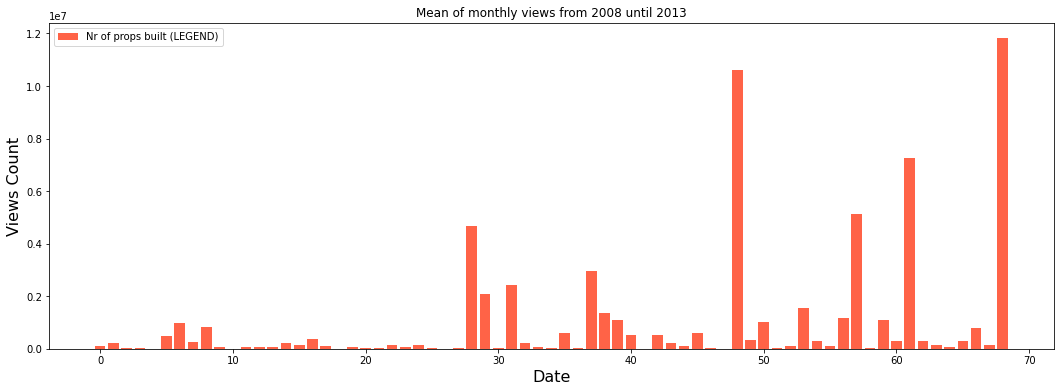

In [42]:
plt.figure(figsize=(18,6))
x = group_month.index
y = group_month.viewCount
plt.bar(x, y, color='tomato', label='Nr of props built (LEGEND)')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Views Count', fontsize=16)
plt.legend()
plt.title('Mean of monthly views from 2008 until 2013')
#plt.savefig('Franc.png', dpi = 400, quality=100)
#plt.savefig('Aitor-beto.svg', dpi = 400, quality=100)
plt.show()
#plt.clf()

In [43]:

df['likes_dislikes'] = df.likeCount / (df.dislikeCount + df.likeCount)
group_month = df.groupby(['year', 'month'], as_index = False).agg({'likes_dislikes': 'mean'})
group_month

,year,month,likes_dislikes
0,2008,1,0.922934
1,2008,2,0.947546
2,2008,4,0.902494
3,2008,5,0.907021
4,2008,6,0.872000
...,...,...,...
64,2013,7,0.952036
65,2013,8,0.968233
66,2013,9,0.959446
67,2013,10,0.954663


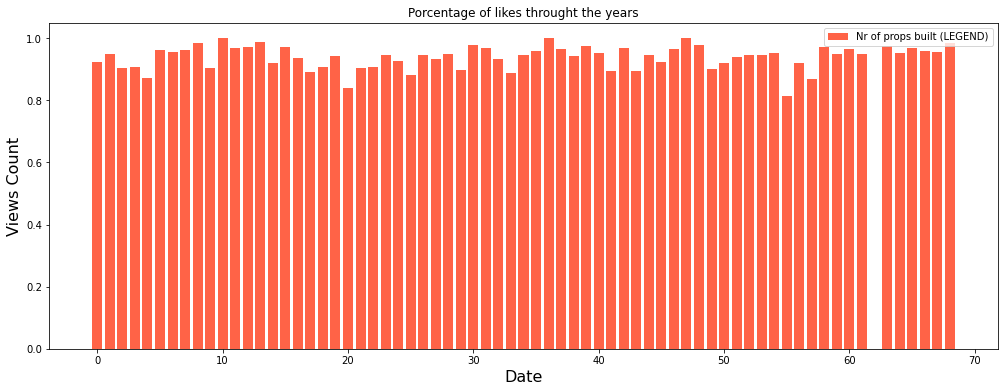

In [44]:
plt.figure(figsize=(17,6))
x = group_month.index
y = group_month.likes_dislikes
plt.bar(x, y, color='tomato', label='Nr of props built (LEGEND)')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Views Count', fontsize=16)
plt.legend()
plt.title('Porcentage of likes throught the years')
#plt.savefig('Franc.png', dpi = 400, quality=100)
#plt.savefig('Aitor-beto.svg', dpi = 400, quality=100)
plt.show()
#plt.clf()